In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sea

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [211]:
diamonds = pd.read_csv('/Users/ayush/Desktop/Diamonds.csv')

In [212]:
diamonds.head()

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24


/var/folders/sd/fhbzzg212_b5_m918tyvhr640000gn/T/ipykernel_10154/2679439612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = diamonds.corr()


,diamond_id,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
diamond_id,1.000000,-0.089329,0.009441,-0.019801,-0.084329,-0.062005,-0.024530,-0.058093
size,-0.089329,1.000000,0.061724,0.090697,0.782678,0.788911,0.350719,0.745963
depth_percent,0.009441,0.061724,1.000000,0.673834,0.128795,0.119690,0.086477,0.025407
table_percent,-0.019801,0.090697,0.673834,1.000000,0.165740,0.141251,0.082533,0.045192
meas_length,-0.084329,0.782678,0.128795,0.165740,1.000000,0.788643,0.342206,0.489212
meas_width,-0.062005,0.788911,0.119690,0.141251,0.788643,1.000000,0.412933,0.506403
meas_depth,-0.024530,0.350719,0.086477,0.082533,0.342206,0.412933,1.000000,0.216410
total_sales_price,-0.058093,0.745963,0.025407,0.045192,0.489212,0.506403,0.216410,1.000000


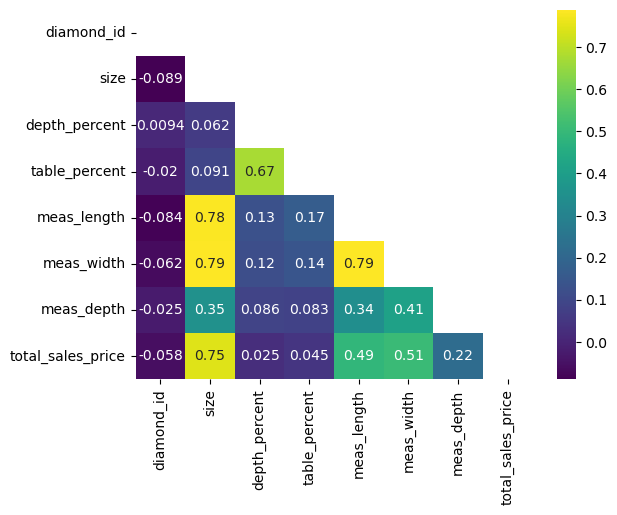

In [213]:
corr_data = diamonds.corr()
corr_mask = np.triu(np.ones_like(corr_data, dtype='bool'))
sea.heatmap(data=corr_data, mask=corr_mask, cmap='viridis', annot=True)
corr_data

In [214]:
def percent_missing(diamonds):
    percent_nan = (100 * diamonds.isnull().sum() / len(diamonds))
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()
    
    return percent_nan

In [215]:
percent_nan = percent_missing(diamonds)

In [216]:
percent_nan

fluor_intensity                 0.058260
color                           4.170156
cut                            27.585752
girdle_min                     37.975185
girdle_max                     38.367986
culet_size                     39.025689
eye_clean                      71.422004
fluor_color                    92.842188
culet_condition                93.027437
fancy_color_dominant_color     95.828933
fancy_color_intensity          95.829844
fancy_color_overtone           99.072388
fancy_color_secondary_color    99.516622
dtype: float64

In [217]:
columns_above_90 = ['fancy_color_dominant_color','fancy_color_intensity','fancy_color_overtone','fancy_color_secondary_color','eye_clean','date']

In [218]:
diamonds.drop(columns_above_90,axis=1,inplace=True)

In [219]:
diamonds.loc[diamonds['culet_condition'].isin(['round', 'oval']), 'culet_condition'].fillna(value='None', inplace=True)
diamonds['culet_condition'].fillna(value='None', inplace=True)
diamonds['fluor_color'].fillna(value='None', inplace=True)

In [220]:
diamonds['girdle_min'].fillna('Unknown',inplace=True)
diamonds['girdle_max'].fillna('Unknown',inplace=True)
diamonds['cut'].fillna('Not Applicable',inplace=True)

In [221]:
diamonds.dropna(subset=['fluor_intensity','color'], inplace=True)

In [222]:
imputer = SimpleImputer(strategy='most_frequent')

# Extract the 'culet_size' column as a DataFrame and apply imputation
culet_size_df = pd.DataFrame(diamonds['culet_size'])
culet_size_df['culet_size'] = imputer.fit_transform(culet_size_df)

# Update the 'culet_size' column in the original DataFrame
diamonds['culet_size'] = culet_size_df['culet_size']

In [223]:
duplicate_ids = diamonds['diamond_id'].duplicated()
duplicate_ids.sum()

0

In [224]:
percent_nan = percent_missing(diamonds)
percent_nan

Series([], dtype: float64)

In [225]:
value_counts = diamonds['shape'].value_counts()

# Calculate the total count of all categories
total_count = len(diamonds['shape'])

# Calculate the percentage of each category
percentage = (value_counts / total_count) * 100

# Display the result
print(percentage)

Round       75.145577
Oval         5.882437
Emerald      5.224611
Pear         4.059523
Princess     3.321903
Heart        2.034273
Radiant      2.008150
Marquise     1.307103
Asscher      0.793191
Cushion      0.223233
Name: shape, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Round'),
  Text(1, 0, 'Pear'),
  Text(2, 0, 'Oval'),
  Text(3, 0, 'Marquise'),
  Text(4, 0, 'Princess'),
  Text(5, 0, 'Emerald'),
  Text(6, 0, 'Heart'),
  Text(7, 0, 'Cushion'),
  Text(8, 0, 'Radiant'),
  Text(9, 0, 'Asscher')])

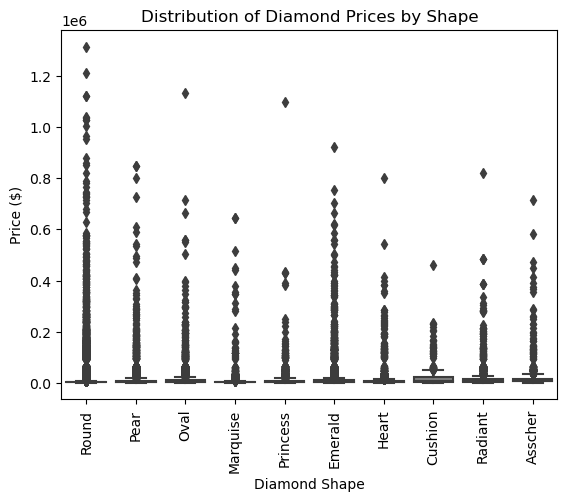

In [226]:
#How does the distribution of diamond prices vary with respect to different diamond shapes?
sea.boxplot(x="shape", y="total_sales_price", data=diamonds)
plt.title("Distribution of Diamond Prices by Shape")
plt.xlabel("Diamond Shape")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)

Text(0, 0.5, 'Price ($)')

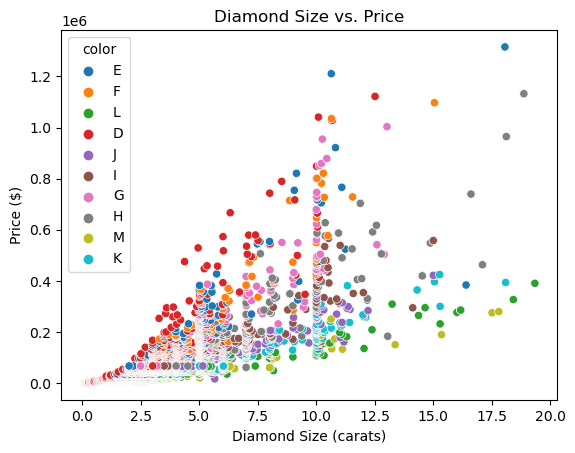

In [227]:
#What is the relationship between diamond size and price? Is it a linear relationship or a more complex one?
sea.scatterplot(x="size", y="total_sales_price", hue='color', data=diamonds)
plt.title("Diamond Size vs. Price")
plt.xlabel("Diamond Size (carats)")
plt.ylabel("Price ($)")

#A lot of variation and outliers because size is not the only contributing factor but the 4Cs (carat weight, cut, color, and clarity) being the most imperative one's

Text(0.5, 1.0, 'Distribution of Culet Conditions')

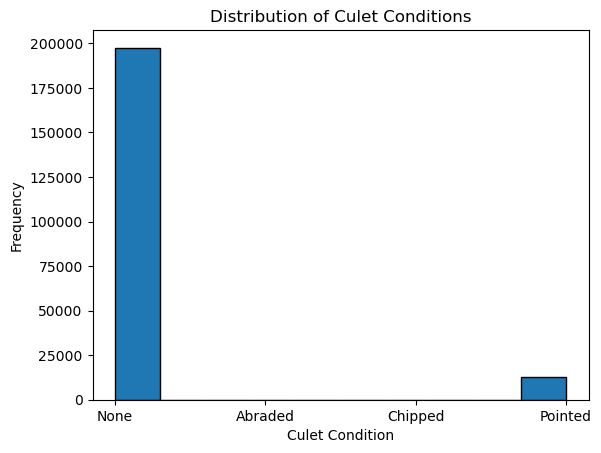

In [228]:
plt.figure(dpi=100)
plt.hist(diamonds['culet_condition'], bins=10, edgecolor='black')
plt.xlabel('Culet Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Culet Conditions')

In [229]:
diamonds = pd.get_dummies(diamonds, columns=['shape','color','cut','clarity','symmetry','polish','girdle_min','girdle_max','culet_size','culet_condition','fluor_color','fluor_intensity','lab'])

In [230]:
diamonds

,diamond_id,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price,shape_Asscher,shape_Cushion,...,fluor_color_Yellow,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
0,131328926,0.09,62.7,59.0,2.85,2.87,1.79,200,0,0,...,0,0,0,1,0,0,0,0,0,1
1,131704776,0.09,61.9,59.0,2.84,2.89,1.78,200,0,0,...,0,0,0,1,0,0,0,0,0,1
2,131584417,0.09,61.1,59.0,2.88,2.90,1.77,200,0,0,...,0,0,0,1,0,0,0,0,0,1
3,131584416,0.09,62.0,59.0,2.86,2.88,1.78,200,0,0,...,0,0,0,1,0,0,0,0,0,1
4,131613644,0.09,64.9,58.5,2.79,2.83,1.82,200,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,133724139,12.52,62.1,58.0,14.84,14.91,9.24,1121792,0,0,...,0,1,0,0,0,0,0,1,0,0
219695,133724138,12.52,62.1,58.0,14.84,14.91,9.24,1121792,0,0,...,0,0,0,1,0,0,0,0,1,0
219697,132904507,18.88,57.1,55.0,21.34,15.23,8.69,1132347,0,0,...,0,1,0,0,0,0,0,1,0,0
219699,135619262,10.65,61.3,58.0,14.06,14.18,8.66,1210692,0,0,...,0,0,0,1,0,0,0,1,0,0


In [231]:
#LINEAR REGRESSION: 

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = diamonds.drop(['diamond_id', 'total_sales_price'], axis=1)
y = diamonds['total_sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.values.reshape(-1, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = model.predict(X_test_norm)

# Calculate the MSE, MAE, and RMSE
mse = mean_squared_error(y_test_norm, y_pred_norm)
mae = mean_absolute_error(y_test_norm, y_pred_norm)
rmse = mean_squared_error(y_test_norm, y_pred_norm, squared=False)
r2 = r2_score(y_test_norm,y_pred_norm)

# Print the results
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print('R2 Score:', r2)

MSE: 4.5341699162164355e+21
MAE: 328141706.1189049
RMSE: 67336245189.4701
R2 Score: -4.473828690605842e+21


In [232]:
#Ride Regression:

import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = diamonds.drop(['diamond_id', 'total_sales_price'], axis=1)
y = diamonds['total_sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.values.reshape(-1, 1))

# Fit a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = ridge.predict(X_test_norm)

# Calculate the MSE, MAE, and RMSE
mse = mean_squared_error(y_test_norm, y_pred_norm)
mae = mean_absolute_error(y_test_norm, y_pred_norm)
rmse = mean_squared_error(y_test_norm, y_pred_norm, squared=False)
r2 = r2_score(y_test_norm,y_pred_norm)

# Print the results
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print('R2 Score:', r2)

MSE: 0.3089068440905184
MAE: 0.17741643558219775
RMSE: 0.5557938863378388
R2 Score: 0.6952041217348375


In [233]:
#Lasso Regression: 

import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = diamonds.drop(['diamond_id', 'total_sales_price'], axis=1)
y = diamonds['total_sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.values.reshape(-1, 1))

# Fit a Lasso regression model
model = Lasso(alpha=0.01)
model.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = model.predict(X_test_norm)

# Calculate the MSE, MAE, and RMSE
mse = mean_squared_error(y_test_norm, y_pred_norm)
mae = mean_absolute_error(y_test_norm, y_pred_norm)
rmse = mean_squared_error(y_test_norm, y_pred_norm, squared=False)
r2 = r2_score(y_test_norm,y_pred_norm)

# Print the results
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print('R2 Score:', r2)

MSE: 0.3136248536704758
MAE: 0.16195153072656032
RMSE: 0.5600221903375578
R2 Score: 0.6905488999386988


In [234]:
#K-Nearest Neighbors:

import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = diamonds.drop(['diamond_id', 'total_sales_price'], axis=1)
y = diamonds['total_sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.values.reshape(-1, 1))

# Fit a KNN regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_norm, y_train_norm.ravel())

# Make predictions on the test set
y_pred_norm = model.predict(X_test_norm)

# Calculate the MSE, MAE, and RMSE
mse = mean_squared_error(y_test_norm, y_pred_norm)
mae = mean_absolute_error(y_test_norm, y_pred_norm)
rmse = mean_squared_error(y_test_norm, y_pred_norm, squared=False)
r2 = r2_score(y_test_norm,y_pred_norm)

# Print the results
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print('R2 Score:', r2)

MSE: 0.22073182672604785
MAE: 0.0980614959581246
RMSE: 0.4698210581977439
R2 Score: 0.7822056963932951


In [235]:
#Decision Tree:

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into features and target variable
X = diamonds.drop(['diamond_id', 'total_sales_price'], axis=1)
y = diamonds['total_sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.values.reshape(-1, 1))

# Fit a decision tree regression model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred = model.predict(X_test_norm)

# Calculate the MSE, MAE, and RMSE
mse = mean_squared_error(y_test_norm, y_pred)
mae = mean_absolute_error(y_test_norm, y_pred)
rmse = mean_squared_error(y_test_norm, y_pred, squared=False)
r2 = r2_score(y_test_norm,y_pred)

# Print the results
print("MSE with decision trees:", mse)
print("MAE with decision trees:", mae)
print("RMSE with decision trees:", rmse)
print('R2 Score:', r2)

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3)

# Train the model on the training data
gb_model.fit(X_train_norm, y_train_norm)

# Make predictions on the test data
y_pred_norm = gb_model.predict(X_test_norm)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test_norm, y_pred_norm)
mae = mean_absolute_error(y_test_norm, y_pred_norm)
rmse = mean_squared_error(y_test_norm, y_pred_norm, squared=False)
r2 = r2_score(y_test_norm,y_pred_norm)

# Print the results
print("MSE with gradient boosting:", mse)
print("MAE with gradient boosting:", mae)
print("RMSE with gradient boosting:", rmse)
print("R^2 score:", r2)

MSE with decision trees: 0.19105487351362782
MAE with decision trees: 0.08400501742791648
RMSE with decision trees: 0.4370982424051003
R2 Score: 0.8114877054897434


/Users/ayush/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE with gradient boosting: 0.08835110882030797
MAE with gradient boosting: 0.057168573274499125
RMSE with gradient boosting: 0.29723914415888764
R^2 score: 0.912824677329921


In [236]:
#JUST FOR REFERENCE AND OLS MODEL WITH P-Values and T-score:

import statsmodels.api as sm

# Add a constant to the features
X_train_ols = sm.add_constant(X_train)

# Fit an OLS regression model
model_ols = sm.OLS(y_train, X_train_ols)
results_ols = model_ols.fit()

# Print the summary of the results
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     4908.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:09:37   Log-Likelihood:            -1.8335e+06
No. Observations:              168433   AIC:                         3.667e+06
Df Residuals:                  168353   BIC:                         3.668e+06
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             